La ecuación de Duffing, es una ecuación diferencial no lineal que describe el movimiento de un oscilador con amortiguamiento, con coeficiente de elasticidad no lineal y al cual se le aplica un forzamiento periódico, 

          x'' + δ x' + α x + β x^3 =  γ cos (ω t)

donde α (rigidez) , β (no linearidad) , γ (amplitud de forzamiento), δ (amortiguamiento) y ω (frecuencia de forzamiento) son constantes.


En esta actividad se pide resolver numéricamente la ecuación de Duffing utilizando la función ode de SciPy para reproducir la figura que aparece al inicio de esta actividad en el caso de que α = γ = 1.0 y amortiguamiento δ = 0.1.

In [1]:
#Importamos las bibliotecas
from math import cos
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

In [2]:
#Arreglos que contienen cada una de las gráficas
w = []
graf = []
        
#Definimos las ecuaciones diferenciales y los parámetros
def f(t, z, p):
    """"
        Ecuaciones diferenciales:
        dx/dt = y
        dy/dt = - δ*y - α*x - β*x**3 + γ*cos(ω*t)
    """
    #Parámetros de la integral
    δ, α, β, γ, ω = p                           
    #Parámetros de integración
    x, y = z                                    
    #Función a integrar
    f = [y, - δ*y - α*x - β*x**3 + γ*cos(ω*t)]  

    return f

#Creamos una instancia para resolver la ecuación diferencial a través del método 'dopri5'
solver = ode(f)
solver.set_integrator('dopri5')

#Especificamos los valores de β
βj = [-0.003,0.0000000001,0.01,0.04]

#Mediante el loop graficamos las soluciones para cada valor de β
for j in range (0,len(βj)):

    #Arreglos para cada valor de w y x
    wi=[]
    grafi=[]

    for i in range(0,251):

        #Especificamos los parámetros de la ecuación a nuestra función
        γ = 1.0
        α = 1.0        
        δ = 0.1
        ω = i*0.01
        β = βj[j]
        val = δ, α, β, γ, ω                      
        solver.set_f_params(val)

        # Fijamos el valor inical z(0) = z0
        t0 = 0.0
        z0 = [1.0, 0]
        solver.set_initial_value(z0, t0)

        #Creamos un arreglo de valores de tiempo t para evaluar la solución; creamos un arreglo que 
        #almacene los valores obtenidos
        t1 = 40
        n = 400
        t = np.linspace(t0, t1, n)
        sol = np.empty((n, 2))
        
        #Asignamos las condiciones iniciales
        sol[0] = z0

        #Llamamos repetidamente al integrador para que avance en la solución un tiempo 'k'
        k = 1

        while solver.successful() and solver.t < t1:
            solver.integrate(t[k])
            sol[k] = solver.y
            k += 1

        x = sol[:,0]
         
        #Guardamos los valores de ω y las amplitudes máximas
        wi.append(ω)
        grafi.append(max(abs(x)))

    #Almacenamos todos los arreglos
    w.append(wi)
    graf.append(grafi)

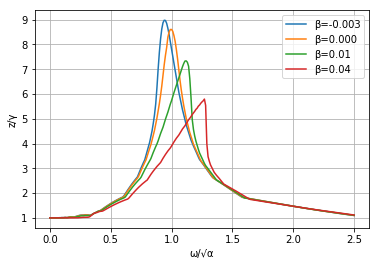

In [6]:
#Realizamos las 4 gráficas en una sola figura
plt.plot(w[0],graf[0],label="β=-0.003")
plt.plot(w[1],graf[1],label="β=0.000")
plt.plot(w[2],graf[2],label="β=0.01")
plt.plot(w[3],graf[3],label="β=0.04")

plt.legend()
plt.grid()
plt.xlabel("ω/√α")
plt.ylabel("z/γ")
plt.grid(True)
plt.savefig('graf1',plt=2000)


La solución presenta una discontinuidad siguiendo rutas distintas, incrementando el valor de ω y luego disminuyéndolo.
Para esto graficaremos las soluciones del oscilador de ida y de vuelta, empleando como condición inicial el punto anterior a cada paso.

 

In [4]:
#Gráfica de ida
graf1 = [] 
w1 = []

#Gráfica de vuelta
graf2 = []
w2 = []

#Número de puntos donde se evaluan las funciones
pts = 100
    
#Definimos nuestras ecuaciones diferenciales y variables
def f(t, z, p):
    """"
        Ecuaciones diferenciales:
          dx/dt = y
          dy/dt = - δ*y - α*dx - β*x**3 + γ*cos(ω*t)
    """
        
    #Parámetros de la integral
    δ, α, β, γ, ω = p                           
    #Parámetros de integración
    x, y = z                                    
    #Función a integrar
    f = [y, - δ*y - α*x - β*x**3 + γ*cos(ω*t)]  
    
    return f
    
#Creamos una instancia para resolver la ecuación diferencial a través del método 'dopri5'
solver = ode(f)
solver.set_integrator('dopri5')
    
#Especificamos los parámetros de la ecuación a nuestra función
γ = 1.0
α = 1.0
β = 0.04
δ = 0.1

#Se crea un arreglo con los valores de ω
ωi = np.linspace(0, 2.5, pts)

#Condiciones iniciales
t0 = 0.0
z0 = [1.0, 0.0] 
z = 0

#Mediante el loop evaluamos la solución para valores de ω
for i in range(0,pts):
     
    ω = ωi[i]
    val = δ, α, β, γ, ω                      
    solver.set_f_params(val)

    # Fijamos el valor inical z(0) = z0
    solver.set_initial_value(z0, t0)
    
    #Creamos un arreglo de valores de tiempo t para evaluar la solución; creamos un arreglo que 
    #almacene los valores obtenidos
    t1 = 20
    n = 400
    t = np.linspace(t0, t1, n)
    sol = np.empty((n, 2))
    sol[0] = z0
    
    #Llamamos repetidamente al integrador para que avance en la solución un tiempo 'k'
    k = 1
    
    while solver.successful() and solver.t < t1:
        solver.integrate(t[k])
        sol[k] = solver.y
        k += 1
        
    x1 = sol[:,0]
    y1 = sol[:,1]
                
    #Actualizamos las condiciones iniciales
    t0 = 0.0
    z0 = [max(x1),0]
    
    #Guardamos los valores de ω y aplitud máxima obtenida
    w1.append(ω)
    graf1.append(z0[0])

#Volvemos a las condiciones iniciales
t0 = 0.0
z0 = [1.0,0.0]


#Leemos el arregllo de ω en sentido contrario
for j in range(0,pts):
    
    if ωi[-j]==0.0:
        ω = 2.5
        val = δ, α, β, γ, ω                      
        solver.set_f_params(val)
    else:
        ω = ωi[-j]
        val = δ, α, β, γ, ω                      
        solver.set_f_params(val)
    
    #Establecemos las condiciones iniciales para la vuelta
    solver.set_initial_value(z0, t0)
    sol[0] = z0
    
    #Llamamos repetidamente al integrador para que avance en la solución un tiempo 'k'
    k = 1
    
    while solver.successful() and solver.t < t1:
        solver.integrate(t[k])
        sol[k] = solver.y
        k += 1
        
    x2 = sol[:,0]
    y2 = sol[:,1]
    
    #Actualizamos las condiciones iniciales
    t0 = 0.0
    z0 = [max(x2),0]
    
    #Guardamos los valores de ω y aplitud máxima obtenida
    w2.append(ω)
    graf2.append(z0[0])     
                

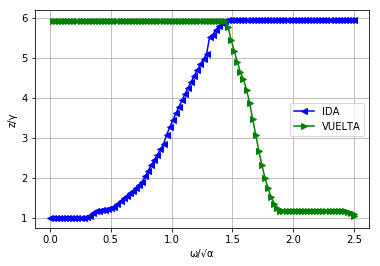

<Figure size 432x288 with 0 Axes>

In [8]:
# Graficamos la solución

plt.plot(w1, graf1, label='IDA',marker='<',color='b')
plt.plot(w2, graf2, label='VUELTA',marker='>',color='g')
plt.xlabel('ω/√α')
plt.ylabel('z/γ')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('graf2',plt=2000)